In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import svd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF


In [11]:
df = pd.read_csv("data/big_foot.csv")
df.fillna(value = "",inplace=True)
df.head(2)

,Unnamed: 0,year,season,month,state,county,location details,nearest town,nearest road,observed,also noticed,other witnesses,other stories,time and conditions,environment,extra,date,see photos from silver star mountain,country,province
0,0,2004,Winter,February,Alaska,Anchorage County,Up near powerline clearings east of Potter Mar...,Anchorage / Hillside,No real roads in the area,I and two of my friends were bored one night s...,"Some tracks in the snow, and a clearing in the...",My two friends were snowmachining behind me bu...,I have not heard of any other incidents in Anc...,Middle of the night. The only light was the he...,"In the middle of the woods, in a clearing cove...",Follow-up investigation report by BFRO Investi...,,,,
1,1,2003,Winter,December,Alaska,Anchorage County,"Few houses on the way, a power relay station. ...",Anchorage,Dowling,"Me and a couple of friends had been bored, whe...","We smelled of colonge and after shave, and one...","4. Me, w-man, warren and sean. We were at my h...",no,"Started at 11, ended at about 3-3 30. Weather ...","A pine forest, with a bog or swamp on the righ...",Follow-up investigation report by BFRO Investi...,Friday night,,,


In [16]:
vectorizer = CountVectorizer(stop_words='english',analyzer='word',max_features=300)
X = vectorizer.fit_transform(df['observed'])
features = vectorizer.get_feature_names()

In [17]:
print(features)
print(X.toarray())

['10', '100', '12', '15', '20', '30', '50', 'ago', 'animal', 'animals', 'appeared', 'approximately', 'area', 'arms', 'asked', 'away', 'bear', 'bed', 'began', 'believe', 'big', 'bigfoot', 'bit', 'black', 'body', 'branches', 'brother', 'brown', 'brush', 'cabin', 'called', 'came', 'camp', 'camping', 'car', 'clear', 'close', 'closer', 'color', 'come', 'coming', 'continued', 'couldn', 'county', 'couple', 'covered', 'creature', 'creek', 'crossed', 'dad', 'dark', 'day', 'days', 'decided', 'deep', 'deer', 'did', 'didn', 'direction', 'dirt', 'distance', 'dog', 'dogs', 'don', 'door', 'driving', 'drove', 'early', 'east', 'edge', 'elk', 'encounter', 'end', 'evening', 'eyes', 'face', 'family', 'far', 'fast', 'father', 'feel', 'feeling', 'feet', 'felt', 'fence', 'field', 'figure', 'finally', 'fishing', 'followed', 'following', 'foot', 'footprints', 'forest', 'friend', 'friends', 'ft', 'getting', 'going', 'gone', 'good', 'got', 'ground', 'hair', 'hairy', 'half', 'hand', 'happened', 'hard', 'head', 'h

In [18]:
from sklearn.decomposition import NMF

def fit_nmf(k,X):
    nmf = NMF(n_components=k)
    nmf.fit(X)
    W = nmf.transform(X);
    H = nmf.components_;
    return nmf.reconstruction_err_

/Users/nicochen/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/nicochen/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


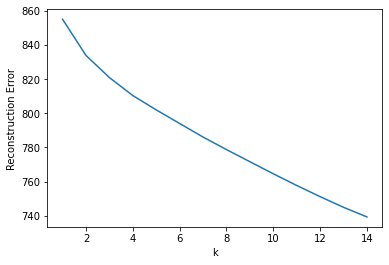

In [19]:
error = [fit_nmf(i,X) for i in range(1,15)]
plt.plot(range(1,15), error)
plt.xlabel('k')
plt.ylabel('Reconstruction Error');

#### Choosing k=4

In [21]:
k=4
nmf = NMF(n_components=k)
nmf.fit(X)
W = nmf.transform(X)
H = nmf.components_

In [22]:
topics = ['latent_topic_{}'.format(i) for i in range(k)]

In [23]:
H = pd.DataFrame(H, index = topics, columns = features)
H

,10,100,12,15,20,30,50,ago,animal,animals,...,west,wide,wife,window,wood,woods,work,yards,year,years
latent_topic_0,0.535707,0.115783,0.259314,0.251212,0.422234,0.463928,0.275813,0.495571,0.000000,0.074504,...,0.148536,0.399214,0.313381,1.079690,0.108015,2.757403,0.282391,0.508332,0.445792,1.364596
latent_topic_1,0.633771,0.213539,0.197636,0.333527,0.382335,0.677234,0.190907,0.188174,1.009978,0.412481,...,0.174368,0.000000,0.470775,0.314624,0.444853,2.303317,0.091106,0.652624,0.351828,0.548661
latent_topic_2,0.863875,0.461361,0.318573,0.646010,0.471331,0.792569,0.484038,0.208552,2.578405,0.496645,...,0.602158,0.730655,0.091510,0.000000,0.304913,0.000000,0.092326,1.508208,0.488681,1.200202
latent_topic_3,0.502102,0.204565,0.107089,0.312905,0.300152,0.437130,0.117330,0.016750,0.727967,0.078864,...,0.606496,0.000000,0.569131,0.000000,0.000000,0.234070,0.331558,0.737692,0.004323,0.049503


In [24]:
H=H.T

In [25]:
H.sort_values('latent_topic_0',ascending = False)

,latent_topic_0,latent_topic_1,latent_topic_2,latent_topic_3
like,6.411291,4.518764,0.000000,0.024779
just,5.512432,1.740471,0.984124,0.778154
saw,5.196225,0.000000,0.000000,3.346653
looked,3.886292,0.000000,0.736770,1.101554
got,3.853417,1.176791,0.192501,0.401804
...,...,...,...,...
approximately,0.000000,0.044317,0.872518,0.596926
tracks,0.000000,0.000000,3.825812,0.000000
track,0.000000,0.000000,1.281469,0.000000
appeared,0.000000,0.000000,1.175182,0.895341


In [26]:
print("The top 10 words in topics:")
for topic in topics:
    words = H.sort_values(topic,ascending = False).index.tolist()
    words_10 = ' '.join(words[:10])
    print(f'{topic}: \n{words_10}\n')

The top 10 words in topics:
latent_topic_0: 
like just saw looked got said went time woods feet

latent_topic_1: 
heard sound like night woods sounds sounded hear loud time

latent_topic_2: 
area tracks tree large lake time feet trail animal camp

latent_topic_3: 
road creature saw car driving hair area seen tall turned

